# Crop recommedation system

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [140]:
#load data
data = pd.read_csv(r'C:\Users\hp\Downloads\Crop-Recommendation-System-Using-Machine-Learning-main\Crop-Recommendation-System-Using-Machine-Learning-main\Crop_recommendation.csv')


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [142]:
print(data.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


### Preprocessing Data

In [144]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())



Checking for missing values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [145]:
# Check for duplicate rows
print("\nChecking for duplicate rows:")
print(f"Duplicates: {data.duplicated().sum()}")


Checking for duplicate rows:
Duplicates: 0


In [146]:
# printing column names
print(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [147]:
print(data.shape)  # Check dataset size

(2200, 8)


In [148]:
#to choose target column
print("Columns in the dataset:", data.columns)
print("\nFirst few rows of the dataset:")
print(data.head())


Columns in the dataset: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

First few rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [149]:
# Splitting the data into independent (features) and dependent (target) variables
X = data.drop('label', axis=1)  # Independent variables (features)
y = data['label']              # Dependent variable (target)

# Display the first few rows of features and target
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

# Import necessary library for train-test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the results of the split
print("\nTraining set:")
print(f"Features shape: {X_train.shape}, Target shape: {y_train.shape}")

print("\nTesting set:")
print(f"Features shape: {X_test.shape}, Target shape: {y_test.shape}")


Features (X):
    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Target (y):
0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

Training set:
Features shape: (1760, 7), Target shape: (1760,)

Testing set:
Features shape: (440, 7), Target shape: (440,)


In [150]:
len(X_train)

1760

In [151]:
len(X_test)

440

### Graph display

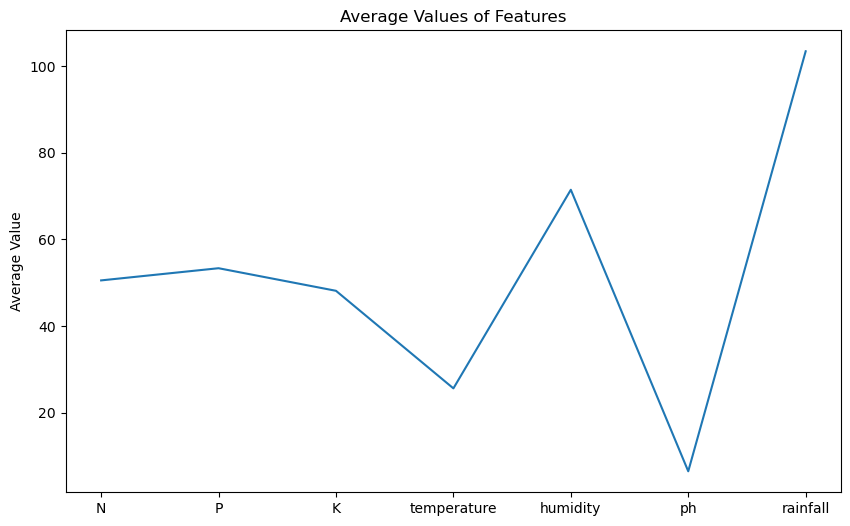

In [153]:
#Line Plot
plt.figure(figsize=(10, 6))
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].mean().plot(kind='line')
plt.title('Average Values of Features')
plt.ylabel('Average Value')
plt.show()

<Figure size 1000x600 with 0 Axes>

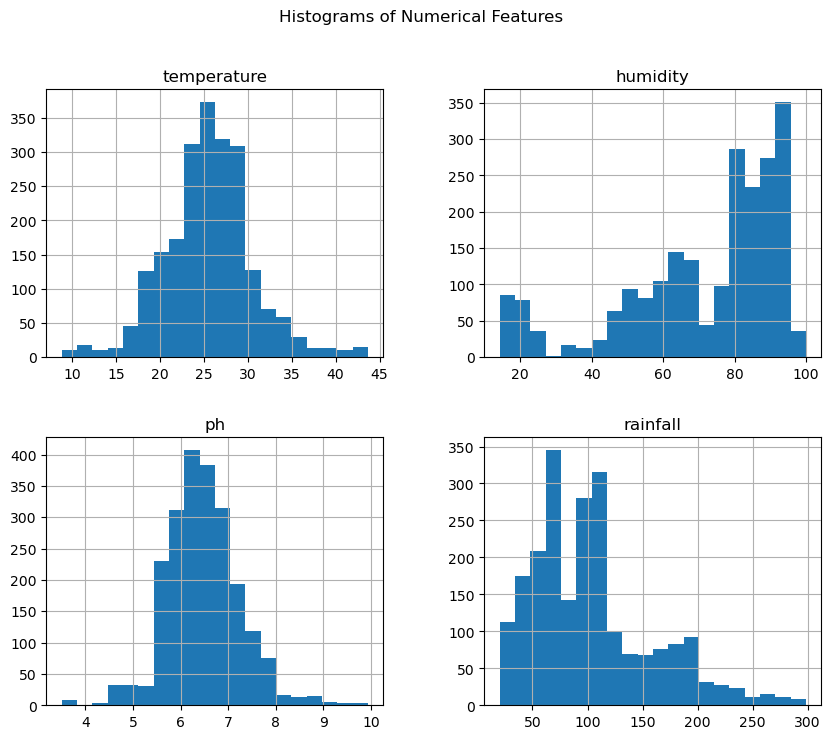

In [155]:
# Histogram
plt.figure(figsize=(10, 6))
data[['temperature', 'humidity', 'ph', 'rainfall']].hist(bins=20, figsize=(10, 8), layout=(2, 2))
plt.suptitle('Histograms of Numerical Features')
plt.show()

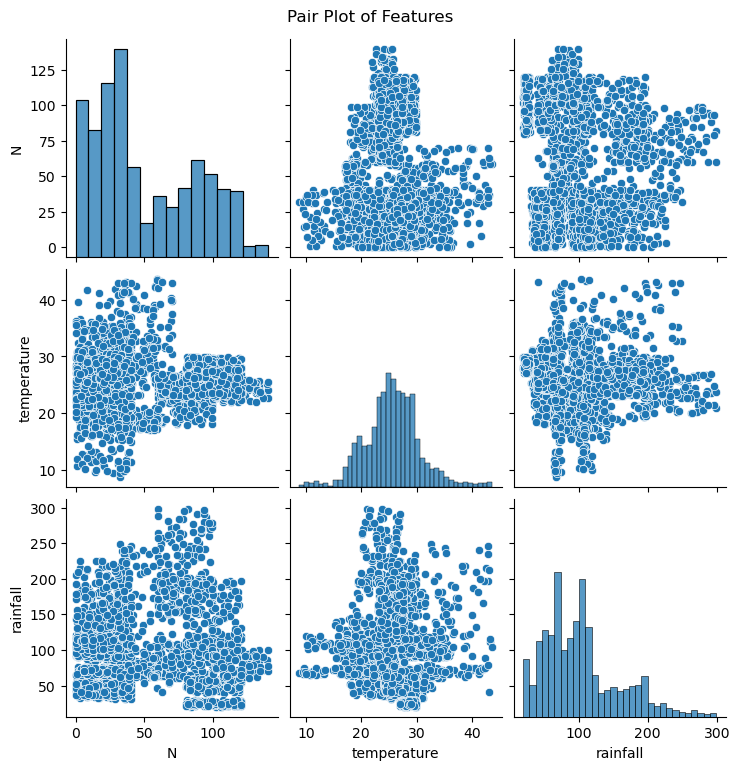

In [156]:
#Pair Plot
#making pair plot for selected data i.e 'N','temperature','rainfall'.
sns.pairplot(data[['N','temperature','rainfall']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

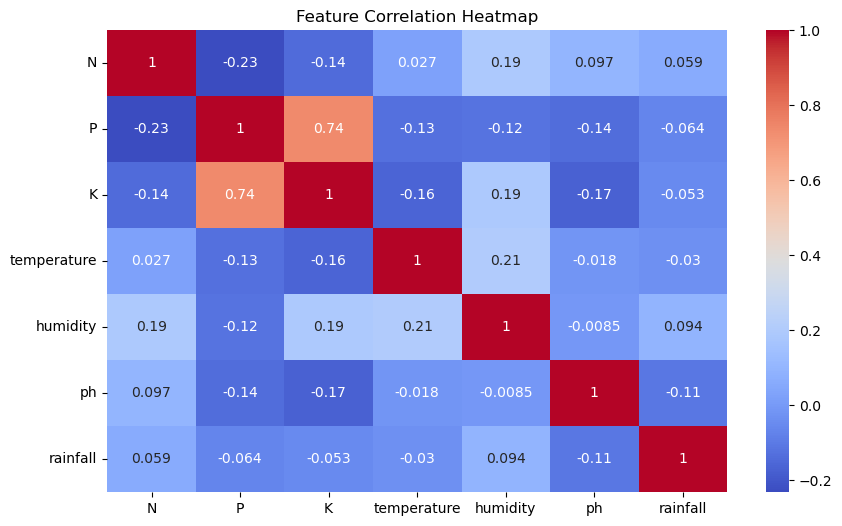

In [157]:
#HeatMap
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


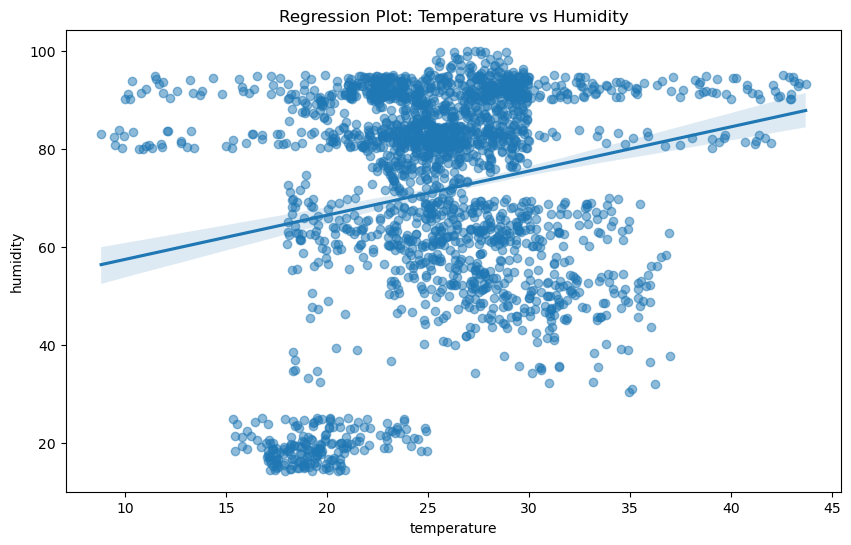

In [158]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='temperature', y='humidity', data=data, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Temperature vs Humidity')
plt.show()

### Model Making

In [160]:
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
labels = data['label']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [162]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
#Model Prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

### Interactive Crop Recommendation System: User Input and Prediction

In [175]:
def get_user_input():
    try:
        n = float(input("Nitrogen (N): "))
        p = float(input("Phosphorus (P): "))
        k = float(input("Potassium (K): "))
        temperature = float(input("Temperature (Celsius): "))
        humidity = float(input("Humidity (%): "))
        ph = float(input("pH level: "))
        rainfall = float(input("Rainfall (mm): "))
        return np.array([[n, p, k, temperature, humidity, ph, rainfall]])
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return None

while True:
    print("\nEnter soil and weather details to get crop recommendations (type 'exit' to quit):")
    user_input = get_user_input()
    if user_input is None:
        continue
    try:
        prediction = model.predict(user_input)
        print("Recommended Crop:", prediction[0])
    except ValueError as e:
        print("Error in prediction. Please check input values.", str(e))

    if input("Would you like to try again? (yes/no): ").strip().lower() != 'yes':
        print("Exiting the program.")
        break



Enter soil and weather details to get crop recommendations (type 'exit' to quit):


Nitrogen (N):  2
Phosphorus (P):  3
Potassium (K):  5
Temperature (Celsius):  22
Humidity (%):  20
pH level:  12
Rainfall (mm):  25


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Recommended Crop: muskmelon


Would you like to try again? (yes/no):  no


Exiting the program.


### Saving model

In [178]:

from joblib import dump

# Save the trained model to a file
model_filename = 'crop_recommendation_model.pkl'
dump(model, model_filename)
print(f"Model saved to {model_filename}")


Model saved to crop_recommendation_model.pkl
